#### 공부 시간에 따른 점수 예측하기
- 목표: 공부시간으로 점수를 예측
- 데이터셋: 임의의 생성
- 피쳐/속성: 공부시간
- 타겟/라벨: 점수
- 학습방법: 지도학습-> 회귀
- 알고리즘: 선형회귀(조건: 데이터의 분포가 선형 분포)

[1] 데이터 준비


In [2]:
# 14개의 데이터셋
jumsu= range(7,100,7)
print(len(jumsu), jumsu[-1])

hour= list(range(1,29,2))
len(hour), hour

14 98


(14, [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27])

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# DataFrame으로 변환
hour_DF= pd.DataFrame(hour, columns=['Hour'])
print(hour_DF.head())

jumsu_SR= pd.Series(jumsu)
print(jumsu_SR)

   Hour
0     1
1     3
2     5
3     7
4     9
0      7
1     14
2     21
3     28
4     35
5     42
6     49
7     56
8     63
9     70
10    77
11    84
12    91
13    98
dtype: int64


Text(0, 0.5, '점수')

C:\Users\KDP-25\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
C:\Users\KDP-25\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\KDP-25\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  func(*args, **kwargs)
C:\Users\KDP-25\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\KDP-25\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\KDP-25\AppData\

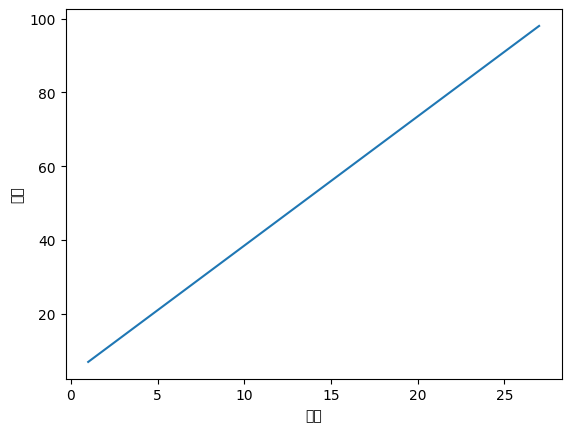

In [6]:
#현재 데이터의 분포 확인
plt.plot(hour_DF, jumsu_SR)
plt.xlabel('시간')
plt.ylabel('점수')

In [7]:
# 모듈 로딩
from sklearn.linear_model import LinearRegression

# 객체 생성
model= LinearRegression()

In [9]:
# 학습 진행    (최대한 많은 데이터를 만족하는 기울기와 절편 찾기)
model.fit(hour_DF, jumsu_SR)

LinearRegression()

In [13]:
# 학습 결과
model.coef_, model.intercept_ #-> 기울기는 array, 절편은 float

print(model.coef_,':',type(model.coef_),'\n', model.intercept_,':', type(model.intercept_))

[3.5] : <class 'numpy.ndarray'> 
 3.500000000000014 : <class 'numpy.float64'>


In [28]:
# y=ax+ b

pre_jumsu= model.coef_[0]*hour_DF + model.intercept_
pre_jumsu= pre_jumsu.values.reshape(-1)

real_jumsu= jumsu_SR.to_numpy()

In [29]:
# 실제와 예측의 차이
pre_jumsu- real_jumsu

array([ 1.33226763e-14,  1.06581410e-14,  1.06581410e-14,  7.10542736e-15,
        7.10542736e-15,  7.10542736e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.42108547e-14, -1.42108547e-14])

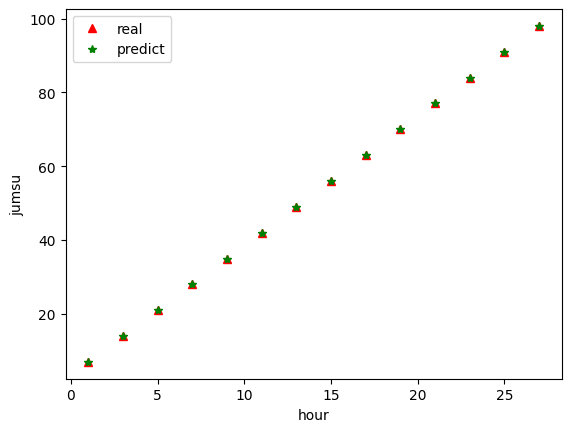

In [35]:
#현재 데이터의 분포 확인
plt.plot(hour_DF, jumsu_SR, 'r^', label='real')
plt.plot(hour_DF, pre_jumsu, 'g*', label='predict')
plt.xlabel('hour')
plt.ylabel('jumsu')
plt.legend()
plt.show()

[3] 모델 성능 평가

In [36]:
model.score(hour_DF, jumsu_SR)

1.0

In [37]:
# 오차 계산 함수, 즉 손실/비용함수 확인
# root_mean_squared_error-> 1.4부터 사용 가능
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [41]:
# 예측값 생성
pre_y= model.predict(hour_DF)

In [43]:
mse= mean_squared_error(jumsu_SR, pre_y) 
rmse= mean_squared_error(jumsu_SR, pre_y, squared=False)
mae= mean_absolute_error(jumsu_SR, pre_y)
r2= r2_score(jumsu_SR, pre_y)
# mse(평균제곱오차), rmse(평균 제곱근 오차), mae(평균 절대오차), r2(결정계수)

In [45]:
# 손실 비용함수 도출
# -> 손실/비용 함수는 0에 가까울 수록 좋은 모델(오차에 대한 값이니까!)


print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(f'mae: {mae}')
print(f'r2: {r2}')   #모델의 score값이 r2스코어

mse: 6.857455154671224e-29
rmse: 8.280975277508818e-15
mae: 6.026924990822278e-15
r2: 1.0
